In [0]:
import os
from google.colab import drive

In [0]:
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
path = 'gdrive/My Drive/Colab Notebooks/desafio-codenation/datas'
os.chdir(path)

In [0]:
!ls

answer10.csv  answer16.csv  answer22.csv  answer28.csv	answer6.csv  train.csv
answer11.csv  answer17.csv  answer23.csv  answer29.csv	answer7.csv
answer12.csv  answer18.csv  answer24.csv  answer2.csv	answer8.csv
answer13.csv  answer19.csv  answer25.csv  answer3.csv	answer9.csv
answer14.csv  answer20.csv  answer26.csv  answer4.csv	answer.csv
answer15.csv  answer21.csv  answer27.csv  answer5.csv	test.csv


In [0]:
!pip install catboost bayesian-optimization

### Importando as bibliotecas necessárias

In [0]:
from itertools import product
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_squared_error, mean_squared_log_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict, KFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import make_pipeline

from sklearn.ensemble import (RandomForestRegressor, GradientBoostingRegressor, 
                              BaggingRegressor, ExtraTreesRegressor)
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.linear_model import Ridge

import lightgbm as lgb
import xgboost as xgb
#import catboost as catb

#from bayes_opt import BayesianOptimization

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
%matplotlib inline
sns.set_style(style='whitegrid')
plt.rcParams['figure.figsize'] = (10, 5)
pd.options.display.max_columns = None

In [0]:
train_set = (pd.read_csv('train.csv').drop('Unnamed: 0', axis=1))
test_set = pd.read_csv('test.csv')
answer_set = pd.DataFrame()

### Preparando os dados - CN,CH, LC, e REDACAO

In [0]:
def count(answer, feedback):
    count = 0
    for a, f in zip(answer, feedback):
        if a in f:
            count += 1
    return count

In [0]:
set(test_set.columns).issubset(set(train_set.columns))

True

In [0]:
train_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT']
test_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC']

In [0]:
train = train_set[train_features].copy()
test = test_set[test_features].copy()

In [0]:
num_feature = df.dtypes[df.dtypes != 'object'].index
cat_feature = df.dtypes[df.dtypes == 'object'].index

num_cols_na = [col_na for col_na in train_set[num_features] if train_set[col_na].isna().any()]
cat_cols_na = [col_na for col_na in train_set[cat_features] if train_set[col_na].isna().any()]

In [0]:
df_info = pd.DataFrame({
    'colunas': train_set.columns
    , 'tipos': train_set.dtypes
    , 'NA #': train_set.isna().sum()
    , 'NA %': (train_set.isna().sum() / train_set.shape[0]) * 100
})

In [0]:
cols_na = [col_na for col_na in train_set.columns if train_set[col_na].isna().any()]

In [0]:
list(train_set.select_dtypes(exclude=[np.number]).columns.values)[1]

'NO_MUNICIPIO_RESIDENCIA'

In [0]:
a = train_set['NU_NOTA_CH']

In [0]:
(a.isna().sum() / a.shape[0]) * 100

24.68317552804079

### Feature Engineering

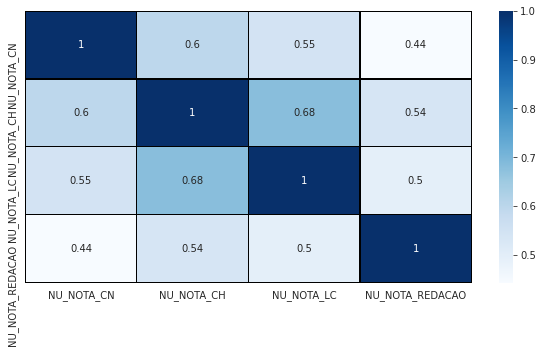

In [0]:
sns.heatmap(test.corr(), annot=True, linewidths=0.5, linecolor='black', cmap='Blues')
plt.show()

In [0]:
train['NU_NOTA_MT'].fillna(0, inplace=True)

In [0]:
#train.dropna(axis=0, inplace=True)
train.fillna(0, inplace=True)
train.isna().sum()

NU_NOTA_CN    0
NU_NOTA_CH    0
NU_NOTA_LC    0
NU_NOTA_MT    0
dtype: int64

In [0]:
#test.dropna(axis=0, inplace=True)
test.fillna(0, inplace=True)
test.isna().sum()

NU_NOTA_CN    0
NU_NOTA_CH    0
NU_NOTA_LC    0
dtype: int64

In [0]:
answer_set['NU_INSCRICAO'] = test_set['NU_INSCRICAO']

In [0]:
#train['ACERTOS_CN'] = train.apply(lambda x: count(x['TX_RESPOSTAS_CN'], x['TX_GABARITO_CN']), axis=1)

#train['ACERTOS_CH'] = train.apply(lambda x: count(x['TX_RESPOSTAS_CH'], x['TX_GABARITO_CH']), axis=1)

#train['ACERTOS_LC'] = train.apply(lambda x: count(x['TX_RESPOSTAS_LC'], x['TX_GABARITO_LC']), axis=1)

#train['ACERTOS_MT'] = train.apply(lambda x: count(x['TX_RESPOSTAS_MT'], x['TX_GABARITO_MT']), axis=1)

In [0]:
#train.drop(columns=cat_features, axis=1, inplace=True)

In [0]:
#train.drop(columns=objective_evidence_data[:4], axis=1, inplace=True)

In [0]:
#train.drop(columns=['TP_LINGUA', 'TP_STATUS_REDACAO'], axis=1, inplace=True)

### EDA

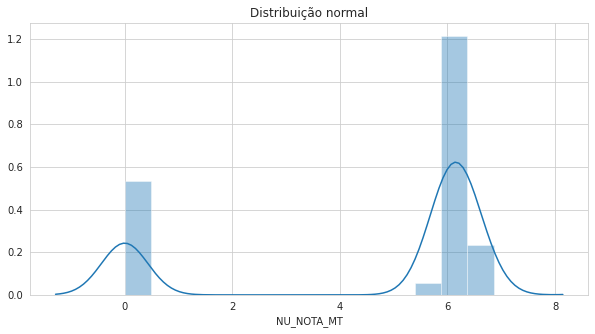

In [0]:
sns.distplot(np.log1p(train['NU_NOTA_MT']))
plt.title('Distribuição normal')
plt.show()

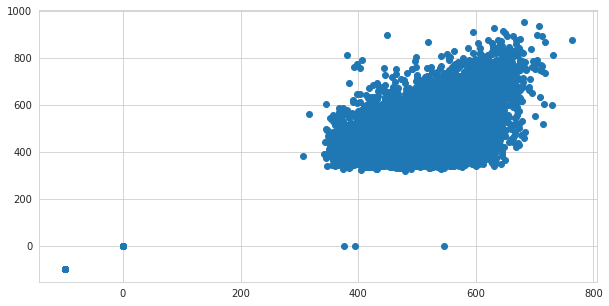

In [0]:
plt.scatter(train['NU_NOTA_LC'], train['NU_NOTA_MT'])
plt.show()

In [0]:
X_train = train.drop('NU_NOTA_MT', axis=1)
X_test = test
y = train['NU_NOTA_MT']

### Validação

In [0]:
def rmsle_log_y(estimator, X, y):
    p = estimator.predict(X)
    return np.sqrt(mean_squared_error(y, p))

In [0]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [0]:
pipe_dtree = make_pipeline(MinMaxScaler(), DecisionTreeRegressor(max_depth=2, random_state=0))
error = cross_val_score(pipe_dtree, X_train, np.log1p(y), cv=kfold, scoring=rmsle_log_y).mean()
error

0.16593744977584418

In [0]:
pipe_etree = make_pipeline(MinMaxScaler(), ExtraTreeRegressor(max_depth=10, random_state=0, min_samples_leaf=10))
error = cross_val_score(pipe_etree, X_train, np.log1p(y), cv=kfold, scoring=rmsle_log_y).mean()
error

0.1555523482429672

In [0]:
pipe_rf = make_pipeline(MinMaxScaler(), RandomForestRegressor(n_estimators=1000, random_state=0))
error = cross_val_score(pipe_rf, X_train, np.log1p(y), cv=kfold, scoring=rmsle_log_y).mean()
error

0.19098489266170648

In [0]:
gbregressor = GradientBoostingRegressor(n_estimators=1000, random_state=0, learning_rate=0.1)
error = cross_val_score(gbregressor, X_train, np.log1p(y), cv=kfold, scoring=rmsle_log_y).mean()
error

0.19602576625166573

In [0]:
bregressor = BaggingRegressor(n_estimators=1000, random_state=0)
error = cross_val_score(bregressor, X, np.log1p(y), cv=kfold, scoring=rmsle_log_y).mean()
error

0.1908995621014596

In [0]:
model = ExtraTreesRegressor(n_estimators=1000, random_state=0)
error = cross_val_score(model, X, np.log1p(y), cv=kfold, scoring=rmsle_log_y).mean()
error

0.19263607219402917

#### RandomForest

In [0]:
random_grid = {
        'extratreesregressor__bootstrap': [True, False],
        'extratreesregressor__max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
        'extratreesregressor__max_features': ['auto', 'log2'],
        'extratreesregressor__min_samples_leaf': [1, 2, 4],
        'extratreesregressor__min_samples_split': [2, 5, 10],
        'extratreesregressor__n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

In [0]:
pipe = make_pipeline(MinMaxScaler(), ExtraTreesRegressor(warm_start=True))
etres_random = RandomizedSearchCV(estimator=pipe, param_distributions=random_grid, 
                               n_iter=100, cv=3, verbose=2, 
                               random_state=42, n_jobs=-1)
etres_random.fit(X_train, np.log1p(y))

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 10.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.5min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('minmaxscaler',
                                              MinMaxScaler(copy=True,
                                                           feature_range=(0,
                                                                          1))),
                                             ('extratreesregressor',
                                              ExtraTreesRegressor(bootstrap=False,
                                                                  ccp_alpha=0.0,
                                                                  criterion='mse',
                                                                  max_depth=None,
                                                                  max_features='auto',
                                                                  max_leaf_nodes=None,
                                              

In [0]:
etres_random.best_params_

{'extratreesregressor__bootstrap': False,
 'extratreesregressor__max_depth': 10,
 'extratreesregressor__max_features': 'auto',
 'extratreesregressor__min_samples_leaf': 1,
 'extratreesregressor__min_samples_split': 10,
 'extratreesregressor__n_estimators': 800}

### Teste

In [0]:
params = {
    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 1000
}

In [0]:
pipe = make_pipeline(MinMaxScaler(), RandomForestRegressor(**params))
pipe.fit(X_train, np.log1p(y))

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('randomforestregressor',
                 RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                       criterion='mse', max_depth=10,
                                       max_features='auto', max_leaf_nodes=None,
                                       max_samples=None,
                                       min_impurity_decrease=0.0,
                                       min_impurity_split=None,
                                       min_samples_leaf=1, min_samples_split=5,
                                       min_weight_fraction_leaf=0.0,
                                       n_estimators=1000, n_jobs=None,
                                       oob_score=False, random_state=None,
                                       verbose=0, warm_start=False))],
         verbose=False)

In [0]:
pipe = make_pipeline(MinMaxScaler(), ExtraTreesRegressor(**params))
pipe.fit(X_train, np.log1p(y))

Pipeline(memory=None,
         steps=[('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('extratreesregressor',
                 ExtraTreesRegressor(bootstrap=True, ccp_alpha=0.0,
                                     criterion='mse', max_depth=10,
                                     max_features='auto', max_leaf_nodes=None,
                                     max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=5,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=1000, n_jobs=None,
                                     oob_score=False, random_state=None,
                                     verbose=0, warm_start=False))],
         verbose=False)

In [0]:
def rmsle(y_true, y_pred):
    """
    Computes the Root Mean Squared Logarithmic Error of a prediction set.
    params:
        y_true: numpy array of ground truth
        y_pred: numpy array of predictions
    """
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

In [0]:
y_pred = etres_random.predict(X_test)

In [0]:
answer_set['NU_NOTA_MT'] = np.round(np.exp(y_pred), 2)

In [0]:
answer_set.to_csv('answer29.csv', index=False, header=True)

### Staking

In [0]:
X = X_train.copy()

for col in X.columns:
    scaler = MinMaxScaler(feature_range=(0, 1))
    X[col] = scaler.fit_transform(X.select_dtypes(include=[np.number])[col].values.reshape(-1, 1))

In [0]:
kfold_out = KFold(n_splits=5, shuffle=True, random_state=1)
kfold_in = KFold(n_splits=5, shuffle=True, random_state=2)

cv_mean = []

params = {

    'bootstrap': True,
    'max_depth': 10,
    'max_features': 'auto',
    'min_samples_leaf': 1,
    'min_samples_split': 5,
    'n_estimators': 1000
}

for fold, (tr, ts) in enumerate(kfold_out.split(X, y)):
    X_train, X_test = X.iloc[tr], X.iloc[ts]
    y_train, y_test = y.iloc[tr], y.iloc[ts]
    
    models = [RandomForestRegressor(**params), 
              GradientBoostingRegressor(n_estimators=1000, random_state=0, learning_rate=0.1)]
    targets = [np.log1p, np.sqrt]
    features_sets = [(X_train, X_test)]
    
    predictions_cv = []
    predictions_test = []
    
    for model, target, feature_set in product(models, targets, features_sets):
        predictions_cv.append(cross_val_predict(model, 
                                                feature_set[0], 
                                                target(y_train), 
                                                cv=kfold_in).reshape(-1, 1))
        model.fit(feature_set[0], target(y_train))
        ptest = model.predict(feature_set[1])
        predictions_test.append(ptest.reshape(-1, 1))
        
    predictions_cv = np.concatenate(predictions_cv, axis=1)
    predictions_test = np.concatenate(predictions_test, axis=1)

    stacker = Ridge()
    stacker.fit(predictions_cv, np.log1p(y_train))
    
    error = rmsle_log_y(stacker, predictions_test, np.log1p(y_test))
    cv_mean.append(error)
    print('RMSLE Fold %d - RMSLE %.4f' % (fold, error))
        
print('RMSLE CV5 %.4f' % np.mean(cv_mean))

RMSLE Fold 0 - RMSLE 0.2036
RMSLE Fold 1 - RMSLE 0.1631
RMSLE Fold 2 - RMSLE 0.1511
RMSLE Fold 3 - RMSLE 0.2082
RMSLE Fold 4 - RMSLE 0.2071
RMSLE CV5 0.1866


In [0]:
predictions = stacker.predict(test.drop('NU_INSCRICAO', axis=1))

In [0]:
pred = model.predict(test.drop('NU_INSCRICAO', axis=1))

In [0]:
answer_set['NU_NOTA_MT'] = np.round(predictions, 2)

In [0]:
answer_set.to_csv('answer2.csv', index=False, header=True)

### Lightgbm

In [0]:
def bayesion_opt_lgbm(X, y, init_iter=3, n_iters=7, random_state=11, seed = 101, num_iterations = 100):
  
    dtrain = lgb.Dataset(data=X, label=y)

    def lgb_r2_score(preds, dtrain):
        labels = dtrain.get_label()
        return 'r2', r2_score(labels, preds), True

    # Objective Function
    def hyp_lgbm(num_leaves, feature_fraction, bagging_fraction, max_depth, min_split_gain, min_child_weight):

        # Default parameters
        params = {
                'application':'regression',
                'num_iterations': num_iterations,
                'learning_rate':0.05, 
                'early_stopping_round':50,
                'metric':'lgb_r2_score'
        }

        params["num_leaves"] = int(round(num_leaves))
        params['feature_fraction'] = max(min(feature_fraction, 1), 0)
        params['bagging_fraction'] = max(min(bagging_fraction, 1), 0)
        params['max_depth'] = int(round(max_depth))
        params['min_split_gain'] = min_split_gain
        params['min_child_weight'] = min_child_weight

        cv_results = lgb.cv(params, dtrain, nfold=5, seed=seed,categorical_feature=[], 
                          stratified=False, verbose_eval =None, feval=lgb_r2_score)

        return np.max(cv_results['r2-mean'])

    # Domain space-- Range of hyperparameters 
    pds = {

        'num_leaves': (80, 100),
        'feature_fraction': (0.1, 0.9),
        'bagging_fraction': (0.8, 1),
        'max_depth': (17, 25),
        'min_split_gain': (0.001, 0.1),
        'min_child_weight': (10, 25)
    }

    # Surrogate model
    optimizer = BayesianOptimization(hyp_lgbm, pds, random_state=random_state)

    # Optimize
    optimizer.maximize(init_points=init_iter, n_iter=n_iters)

    return optimizer

In [0]:
results = bayesion_opt_lgbm(X.values, y, init_iter=5, n_iters=10, random_state=77, seed=101, num_iterations=200)

|   iter    |  target   | baggin... | featur... | max_depth | min_ch... | min_sp... | num_le... |
-------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:1209: UserWarning: categorical_feature in Dataset is overridden.
New categorical_feature is []
  'New categorical_feature is {}'.format(sorted(list(categorical_feature))))


|  1        |  0.4017   |  0.9838   |  0.6138   |  23.03    |  12.09    |  0.009645 |  95.76    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  2        |  0.4022   |  0.8652   |  0.5329   |  18.92    |  18.18    |  0.04065  |  94.3     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  3        |  0.4033   |  0.9673   |  0.5708   |  19.37    |  14.22    |  0.07085  |  88.45    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  4        |  0.4043   |  0.8115   |  0.6976   |  20.62    |  12.64    |  0.005888 |  85.85    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  5        |  0.4041   |  0.8134   |  0.7009   |  17.51    |  16.48    |  0.03705  |  83.04    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  6        |  0.4072   |  0.8983   |  0.3464   |  24.09    |  24.98    |  0.0118   |  80.1     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  7        |  0.4046   |  0.887    |  0.5714   |  24.87    |  24.86    |  0.03633  |  80.5     |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  8        |  0.4076   |  0.9028   |  0.1017   |  24.81    |  10.04    |  0.04551  |  80.19    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  9        |  0.4076   |  0.959    |  0.4298   |  24.93    |  10.92    |  0.02887  |  80.18    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  10       |  0.4051   |  0.9595   |  0.6808   |  24.19    |  10.02    |  0.05993  |  80.18    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  11       |  0.4051   |  0.8092   |  0.6326   |  24.07    |  10.12    |  0.02974  |  80.03    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  12       |  0.4213   |  0.9608   |  0.7621   |  24.75    |  24.54    |  0.07054  |  80.46    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  13       |  0.4053   |  0.8547   |  0.1779   |  17.22    |  10.68    |  0.03989  |  99.98    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  14       |  0.4182   |  1.0      |  0.9      |  25.0     |  25.0     |  0.1      |  100.0    |


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:430: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))
/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:435: UserWarning: Found `early_stopping_round` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


|  15       |  0.405    |  0.9649   |  0.1139   |  17.62    |  24.63    |  0.01421  |  99.62    |


In [0]:
params_lgbm = {
    'bagging_fraction': 0.9608,
    'feature_fraction': 0.7620,
    'max_depth': 24,
    'min_child_weight': 24,
    'min_split_gain': 0.0705,
    'num_leaves': 80
}

lgbm_regressor = LGBMRegressor(**params_lgbm)
lgbm_regressor.fit(X_train, np.log1p(y_train), eval_set=[(X_test, np.log1p(y_test))], eval_metric='rmsle')

[1]	valid_0's l2: 0.127056
[2]	valid_0's l2: 0.124177
[3]	valid_0's l2: 0.121542
[4]	valid_0's l2: 0.119779
[5]	valid_0's l2: 0.117817
[6]	valid_0's l2: 0.115964
[7]	valid_0's l2: 0.114404
[8]	valid_0's l2: 0.113225
[9]	valid_0's l2: 0.112228
[10]	valid_0's l2: 0.111379
[11]	valid_0's l2: 0.110652
[12]	valid_0's l2: 0.11025
[13]	valid_0's l2: 0.109486
[14]	valid_0's l2: 0.108952
[15]	valid_0's l2: 0.108523
[16]	valid_0's l2: 0.108045
[17]	valid_0's l2: 0.107715
[18]	valid_0's l2: 0.107366
[19]	valid_0's l2: 0.107091
[20]	valid_0's l2: 0.106856
[21]	valid_0's l2: 0.106588
[22]	valid_0's l2: 0.106331
[23]	valid_0's l2: 0.105976
[24]	valid_0's l2: 0.105774
[25]	valid_0's l2: 0.105609
[26]	valid_0's l2: 0.105387
[27]	valid_0's l2: 0.105101
[28]	valid_0's l2: 0.104915
[29]	valid_0's l2: 0.104775
[30]	valid_0's l2: 0.104974
[31]	valid_0's l2: 0.105163
[32]	valid_0's l2: 0.105017
[33]	valid_0's l2: 0.104835
[34]	valid_0's l2: 0.104836
[35]	valid_0's l2: 0.105015
[36]	valid_0's l2: 0.105015
[3

LGBMRegressor(bagging_fraction=0.9608, boosting_type='gbdt', class_weight=None,
              colsample_bytree=1.0, feature_fraction=0.762,
              importance_type='split', learning_rate=0.1, max_depth=24,
              min_child_samples=20, min_child_weight=24, min_split_gain=0.0705,
              n_estimators=100, n_jobs=-1, num_leaves=80, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [0]:
pred_lgbm = np.round(np.exp(lgbm_regressor.predict(test.drop('NU_INSCRICAO', axis=1))), 2)

In [0]:
answer_set['NU_NOTA_MT'] = pred_lgbm

In [0]:
answer_set.to_csv('answer4.csv', index=False, header=True)

### XGBoost